<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/notebooks/AFH_peps_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 776, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 776 (delta 163), reused 131 (delta 47), pack-reused 483
Receiving objects: 100% (776/776), 7.13 MiB | 5.96 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [2]:
## uncomment to mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


There are 800 edges, and 400 tensors
| D max:   4 | dt: 0.100000 | iteration:     2/  200 | convergence error:   0.0496963041 | energy per-site:    0.14590984700 | iteration time:  17.3 sec | total time    0.29 min
| D max:   4 | dt: 0.100000 | iteration:     4/  200 | convergence error:   0.0597690301 | energy per-site:   -0.10384190410 | iteration time:  11.2 sec | total time    0.47 min
| D max:   4 | dt: 0.100000 | iteration:     6/  200 | convergence error:   0.0384135091 | energy per-site:   -0.28584851920 | iteration time:  11.4 sec | total time    0.66 min
| D max:   4 | dt: 0.100000 | iteration:     8/  200 | convergence error:   0.0206124423 | energy per-site:   -0.38545562400 | iteration time:  11.2 sec | total time    0.85 min
| D max:   4 | dt: 0.100000 | iteration:    10/  200 | convergence error:   0.0130580547 | energy per-site:   -0.44345441080 | iteration time:  11.4 sec | total time    1.04 min
| D max:   4 | dt: 0.100000 | iteration:    12/  200 | convergence error:

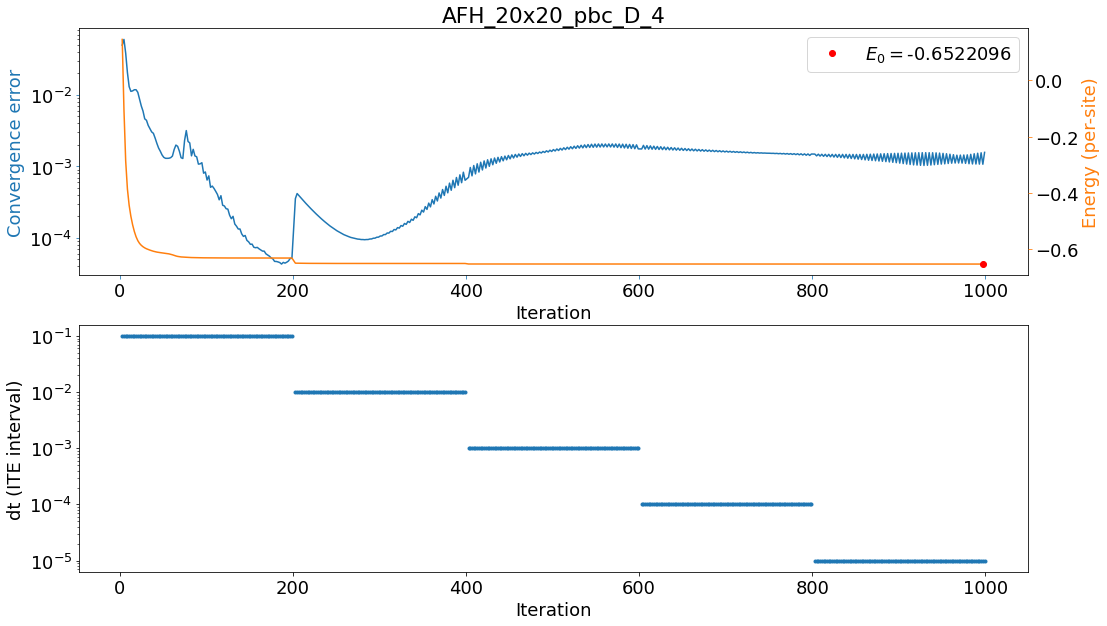

Saving network...


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su
import structure_matrix_generator as smg


np.random.seed(216)

# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

# The Tensor Network structure matrix
n = 20
structure_matrix = smg.peps_square_periodic_boundary_conditions(n)
print(f'There are {structure_matrix.shape[1]} edges, and {structure_matrix.shape[0]} tensors')

# AFH Hamiltonian interaction parameters
j_ij = [1.] * structure_matrix.shape[1]

# maximal bond dimension
d_max_ = [4]

# convergence error between consecutive lambda weights vectors
error = 1e-8

# maximal number of SU iterations
max_iterations = 200

# time intervals for the ITE
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# magnetic field weight (if 0, there is no magnetic field)
h_k = 0.

energies = []

# Run Simple Update
for d_max in d_max_:
    # create Tensor Network name for saving
    network_name = 'AFH_' + str(n) + 'x' + str(n) + '_pbc_' + 'D_' + str(d_max)

    # create the Tensor Network object
    AFH_TN = TensorNetwork(structure_matrix=structure_matrix,
                           virtual_dim=2,
                           network_name=network_name,
                           dir_path='/content/gdrive/MyDrive/tmp')

    # create the Simple Update environment
    AFH_TN_su = su.SimpleUpdate(tensor_network=AFH_TN,
                                dts=dts,
                                j_ij=j_ij,
                                h_k=h_k,
                                s_i=s_i,
                                s_j=s_j,
                                s_k=s_k,
                                d_max=d_max,
                                max_iterations=max_iterations,
                                convergence_error=error,
                                log_energy=True,
                                print_process=True)

    # run Simple Update algorithm over the Tensor Network state
    AFH_TN_su.run()

    # compute the energy per-site observable
    energy = AFH_TN_su.energy_per_site()
    print(f'| D max: {d_max} | Energy: {energy}\n')
    energies.append(energy)

    # plot su convergence / energy curve
    AFH_TN_su.plot_convergence_curve()

    # save the tensor network
    AFH_TN.save_network()
